# Экстремумы дня. Время возникновения максимумов и минимумов за день.

In [1]:
# Импорт библиотек
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,12)

In [2]:
# Шрифт надписей к графикам
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
dir_source = Path('c:/data_finam_quote_csv')  # Папка откуда берем csv файлы для обработки
file_mask = 'SPFB.RTS_5min_*.csv'  # Маска файлов, которые обрабатываем

In [4]:
file_lst = list(dir_source.glob(file_mask))  # Создаем список файлов которые будем обрабатывать
file_lst[0:5]  # Проверяем, что список файлов сформирован

[WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200103.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200106.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200108.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200109.csv'),
 WindowsPath('c:/data_finam_quote_csv/SPFB.RTS_5min_200110.csv')]

In [5]:
# Далее в цикле нужно обрабатывать файлы, поэтому создаем функцию, которая из списка файлов слелает dataframe
def prepare_df(df):
    """
    Подготавливает df для подсчета экстремумов
    :param df: Получает на вход df
    :return: Возвращает обработанный df
    """
    df['<TIME>'] = pd.to_datetime(df['<TIME>'], format='%H%M%S').dt.time  # Меняем тип поля '<TIME>'
    df = df.set_index(df['<TIME>'])  # Меняем индекс на '<TIME>'

    # Удаляем ненужные колонки. axis=1 означает, что удаляем колонку
    df = df.drop(['<TIME>', '<DATE>', '<OPEN>', '<CLOSE>', '<VOL>'], axis=1)
    return df


def create_df_for_plot(file_lst):
    """
    Создает dataframe для построения графика экстремумов по времени
    :param file_lst: Получает список файлов (по дням) для обработки
    :return: Возвращает dataframe с экстремумами (частота экстремумом в определенное время)
    """
    extremum_dic = {}  # Создаем словарь где будем подсчитывать экстремумы, ключами будет время
    for file in file_lst:  # Проходимся по списку файлов
        df_quote = pd.read_csv(file, delimiter=',')  # Загружаем файл в DF

        df_quote = prepare_df(df_quote)  # Обработка (подготовка) df

        max_time = df_quote['<HIGH>'].idxmax()  # Определяем индекс(время) максимума
        min_time = df_quote['<LOW>'].idxmin()  # Определяем индекс(время) минимума

        # Записываем макс и мин в словарь
        if max_time in extremum_dic:
            extremum_dic[max_time][0] += 1
        else:
            extremum_dic[max_time] = [1, 0]
        if min_time in extremum_dic:
            extremum_dic[min_time][1] += 1
        else:
            extremum_dic[min_time] = [0, 1]

    df = pd.DataFrame.from_dict(extremum_dic, orient='index', columns=['max', 'min'])  # Создаем df из словаря
    df.sort_index(inplace=True)  # Сортируем df по индексу (по времени)
    return df

In [6]:
df = create_df_for_plot(file_lst)  # Создаем df для построения графика
df

,max,min
10:00:00,56,48
10:05:00,6,7
10:10:00,7,4
10:15:00,1,8
10:20:00,3,2
...,...,...
23:25:00,1,1
23:30:00,1,0
23:35:00,0,1
23:40:00,1,0


Видно, что основная масса экстремуов приходится на первую свечу за день, подсчитаем процент

In [7]:
sum_first_row = df.loc[df.index[0]].sum()  # Сумма 0 строки (в 10:00:00) (количество мин и макс экстремумов)
percent_first = sum_first_row / df.sum().sum() * 100  # Процент экстремумов в 10:00
print(f'Процент экстремумов приходящихся на начало сессии равно {percent_first:.{2}f}%')

Процент экстремумов приходящихся на начало сессии равно 24.30%


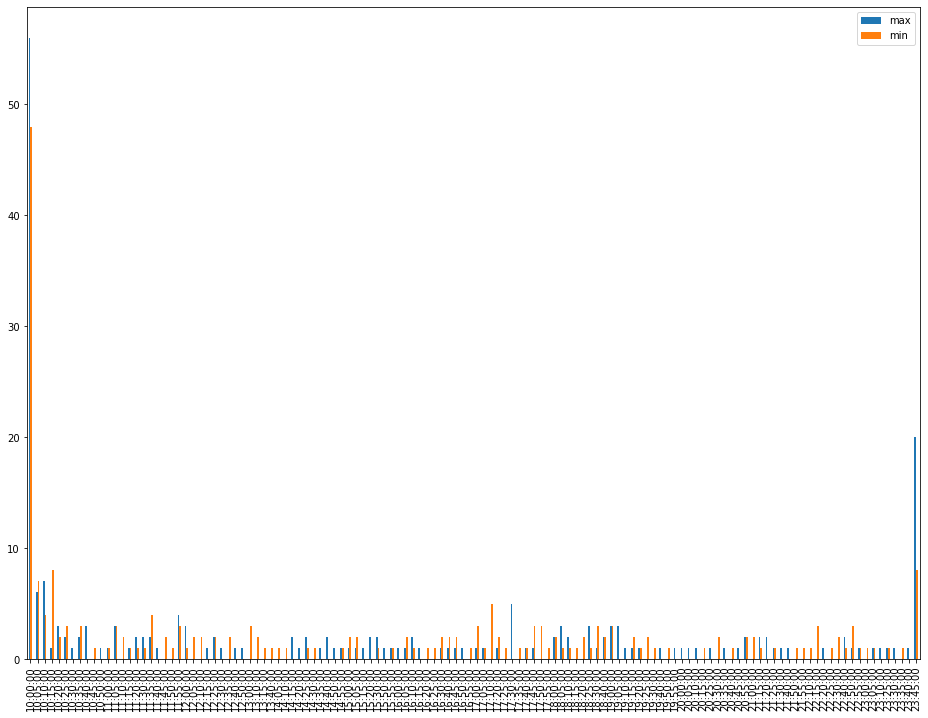

In [8]:
# Строим график в виде гистограммы
df.plot(kind='bar')
plt.show()